# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Determine Business Objectives
a. **Background:** We have a dataset containing features on 426k used cars and their prices.

b. **Business Objectives:** The goal is to understand what features make a car more or less expensive so we can eventually give advice to our client on what drivers value.

c. **Business Success Criteria:** The final model should provide recommendations to the client on what features consumers value in a car. The model would do this by predicting the price through a given feature set. 

#### Assess Situation

a. **Inventory of Resources:** Previous lectures, notebooks, and assignements. Search engines like Google.

b. **Requirements, Assumptions, and Constraints:** Dealing with a subset of the total data to avoid hardware resource roadblocks. Assuming the given data is correct.

c. **Risks and Contingencies Terminology:** Our model might be detrimental to our client if it's over fitted or just plain inaccurate.  

d. **Costs and Benefits:** The potential benefits of this model are that our clients will be able to enhance their sales by only targeting sales of cars that are most appealing to customers. This could be used in companies across the country.  

#### Determine Data Mining Goals

a. **Data Mining Goals:** The good news is we are provided with the dataset. The next part would be to perform exploratory data analysis and data processing to prepare our data for training.

b. **Data Mining Success Criteria:** The success criteria would be having enough data to find relationships between features and targets. Having clean enough data to be able to draw conclusions out of both categorical and coninutious features. 

#### Produce Project Plan

a. **Project Plan:** Follow the CRISP-DM framework, explore the data, prep the data, find relationships, narrow the features, explore different regression models, evaluate them, choose the best one.

b. **Initial Assessment of Tools and Techniques:** Will be using the scikit learn, numpy, pandas, and seaborn libraries for data exploration and modeling.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Data Exploration Steps
1. Exploring shape, size, data types, columns.

2. Missing values

3. Duplicated values

4. Column correlation

5. Draw conclusions from what we see


In [4]:
"""
imports
"""
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [18]:
df = pd.read_csv('data/vehicles.csv')

In [19]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [20]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [21]:
check(df)

,column,dtypes,nunique,sum_null
0,id,int64,426880,0
1,region,object,404,0
2,price,int64,15655,0
3,year,float64,114,1205
4,manufacturer,object,42,17646
5,model,object,29649,5277
6,condition,object,6,174104
7,cylinders,object,8,177678
8,fuel,object,5,3013
9,odometer,float64,104870,4400


In [22]:
def second_check(df):
    print(len(df.index))
    print(df.shape)
    print('_____')
    print(df.describe())

In [23]:
second_check(df)

426880
(426880, 18)
_____
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


**We can start to draw a few conclusions:**

1. id is a useless feature

2. we have many missing values

3. we will have to deal with quite a few categorical values

4. we might have to deal with some outliers

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [25]:
# dropping id as discussed
df.drop('id',axis=1,inplace=True)

In [26]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [27]:
# lets start looking at the car manufacturers and models since they are a good starting point to predict prices
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [152]:
df['title_status'].unique()

array([0, 4, 1, 5, 2, 3])

In [37]:
df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

#### Possible Feature Conclusions
1. The following features seem important and need to be kept: manufacturer, year, cylinders, fuel, odometer, transmission, state
2. The following features have TOO many missing data and don't seem important: paint color, VIN, size

In [46]:
def handle_cylinders(str_cyl):
    if isinstance(str_cyl, str):
        if 'cylinders' in str_cyl:
            return int(str_cyl.split(' ')[0])
    return np.nan

In [47]:
# make cylinders into an integer
df['cylinders'] = df.apply(lambda x: handle_cylinders(x['cylinders']), 1)

In [50]:
second_check(df)

426880
(426880, 17)
_____
              price           year      cylinders      odometer
count  4.268800e+05  425675.000000  247904.000000  4.224800e+05
mean   7.519903e+04    2011.235191       5.968685  9.804333e+04
std    1.218228e+07       9.452120       1.602962  2.138815e+05
min    0.000000e+00    1900.000000       3.000000  0.000000e+00
25%    5.900000e+03    2008.000000       4.000000  3.770400e+04
50%    1.395000e+04    2013.000000       6.000000  8.554800e+04
75%    2.648575e+04    2017.000000       8.000000  1.335425e+05
max    3.736929e+09    2022.000000      12.000000  1.000000e+07


In [51]:
# filling missing cylinder fields with median and mean value (6)
df['cylinders'].fillna(value=6, inplace=True)

In [54]:
# dropping rows that don't have manufacturer, year, fuel, odometer, or transmission since these fields seem to have low missing counts and high importance.
df = df[df['manufacturer'].notna()]
df = df[df['year'].notna()]
df = df[df['fuel'].notna()]
df = df[df['odometer'].notna()]
df = df[df['transmission'].notna()]

In [56]:
# dropping useless/high missing count columns like VIN, paint_color, etc
df.drop('VIN',axis=1,inplace=True)
df.drop('size',axis=1,inplace=True)
df.drop('type',axis=1,inplace=True)
df.drop('paint_color',axis=1,inplace=True)
df.drop('drive',axis=1,inplace=True)

In [57]:
check(df)

,column,dtypes,nunique,sum_null
0,region,object,404,0
1,price,int64,15201,0
2,year,float64,108,0
3,manufacturer,object,42,0
4,model,object,22873,5178
5,condition,object,6,161478
6,cylinders,float64,7,0
7,fuel,object,5,0
8,odometer,float64,101678,0
9,title_status,object,6,6761


In [63]:
# deciding to drop model as well since it looks too unique and its categorical.
# deciding to drop rows that are missing on title status since there aren't very many missing
df.drop('model',axis=1,inplace=True)
df = df[df['title_status'].notna()]

In [64]:
check(df)

,column,dtypes,nunique,sum_null
0,region,object,404,0
1,price,int64,14736,0
2,year,float64,108,0
3,manufacturer,object,42,0
4,condition,object,6,160167
5,cylinders,float64,7,0
6,fuel,object,5,0
7,odometer,float64,100440,0
8,title_status,object,6,0
9,transmission,object,3,0


In [84]:
# filling approx 60 percent of condition missing as 'good' and the rest as 'excellent' since that is what the existing data ratios looked like as well.
df_cond_filled = df[df['condition'].isnull()][:96100].fillna(value='good').append(df[df['condition'].isnull()][96100:].fillna(value='excellent'), ignore_index=True)

/tmp/ipykernel_677582/257768745.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cond_filled = df[df['condition'].isnull()][:96100].fillna(value='good').append(df[df['condition'].isnull()][96100:].fillna(value='excellent'), ignore_index=True)


In [91]:
df = df[df['condition'].notna()].append(df_cond_filled, ignore_index=True)


/tmp/ipykernel_677582/571411267.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df[df['condition'].notna()].append(df_cond_filled, ignore_index=True)


In [92]:
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,state
0,auburn,33590,2014.0,gmc,good,8.0,gas,57923.0,clean,other,al
1,auburn,22590,2010.0,chevrolet,good,8.0,gas,71229.0,clean,other,al
2,auburn,39590,2020.0,chevrolet,good,8.0,gas,19160.0,clean,other,al
3,auburn,30990,2017.0,toyota,good,8.0,gas,41124.0,clean,other,al
4,auburn,15000,2013.0,ford,excellent,6.0,gas,128000.0,clean,automatic,al
...,...,...,...,...,...,...,...,...,...,...,...
394746,wyoming,6977,2011.0,honda,excellent,6.0,gas,112396.0,clean,automatic,wy
394747,wyoming,4977,2005.0,nissan,excellent,6.0,gas,154917.0,clean,automatic,wy
394748,wyoming,7977,2009.0,toyota,excellent,6.0,gas,142868.0,clean,automatic,wy
394749,wyoming,7477,2012.0,fiat,excellent,6.0,gas,64267.0,clean,manual,wy


In [93]:
# lets separate the categorical columns for future use
categorical_cols=df.select_dtypes(include=['object']).columns

In [94]:
df[categorical_cols].head()

,region,manufacturer,condition,fuel,title_status,transmission,state
0,auburn,gmc,good,gas,clean,other,al
1,auburn,chevrolet,good,gas,clean,other,al
2,auburn,chevrolet,good,gas,clean,other,al
3,auburn,toyota,good,gas,clean,other,al
4,auburn,ford,excellent,gas,clean,automatic,al


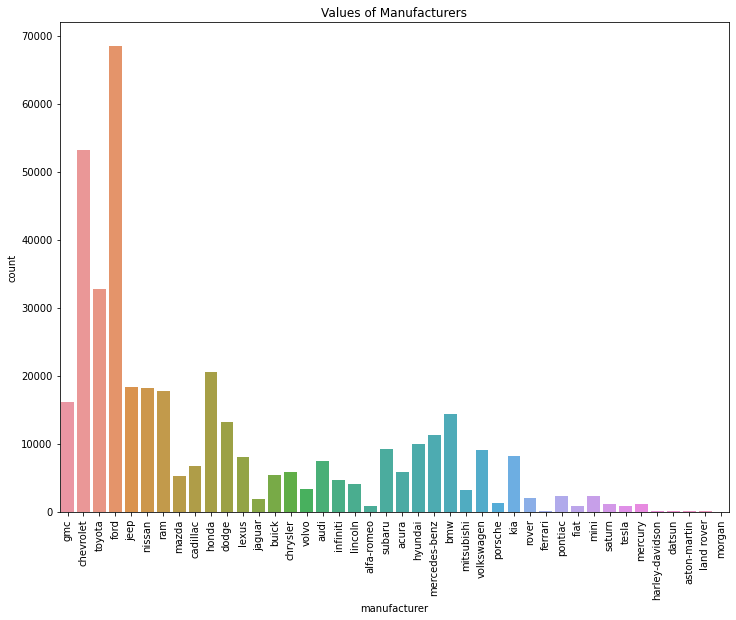

In [100]:
plt.figure(figsize=(12,9))
sns.countplot(x='manufacturer',data=df)
plt.xticks(rotation=90)
plt.title('Values of Manufacturers')
plt.show()

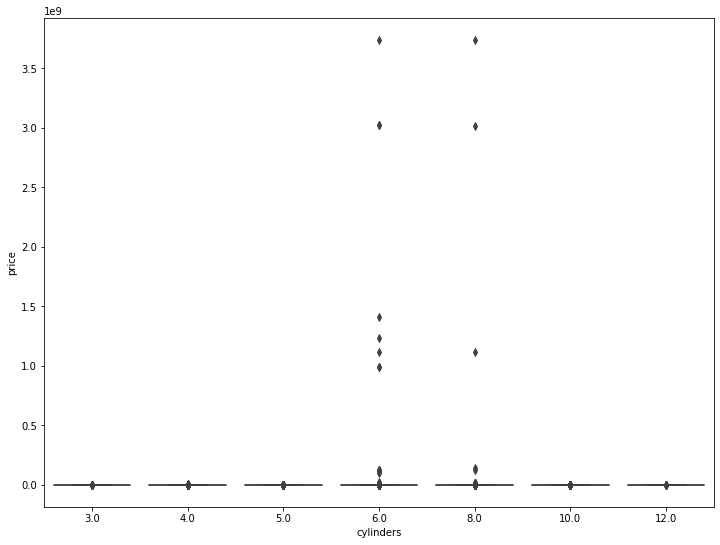

In [103]:
plt.figure(figsize=(12,9))
sns.boxplot(x = 'cylinders', y = 'price', data = df,palette='Accent')

plt.show()

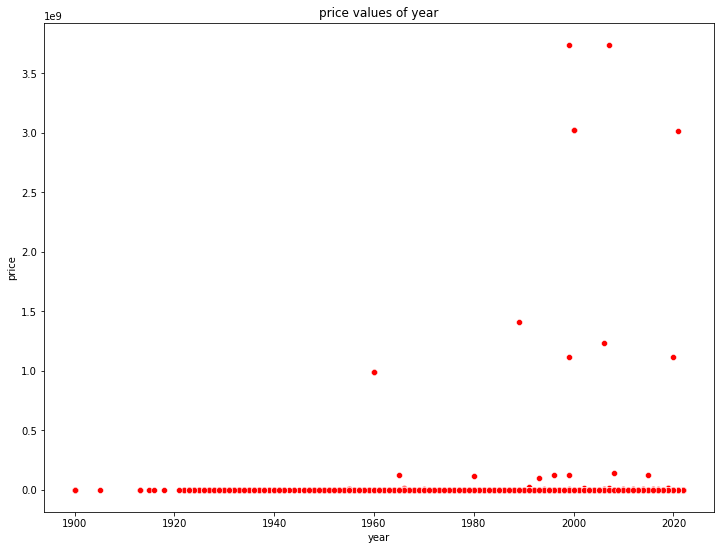

In [105]:
plt.figure(figsize=(12,9))
sns.scatterplot(x="year", y="price", data=df,color='red')
plt.title('price values of year')
plt.show()

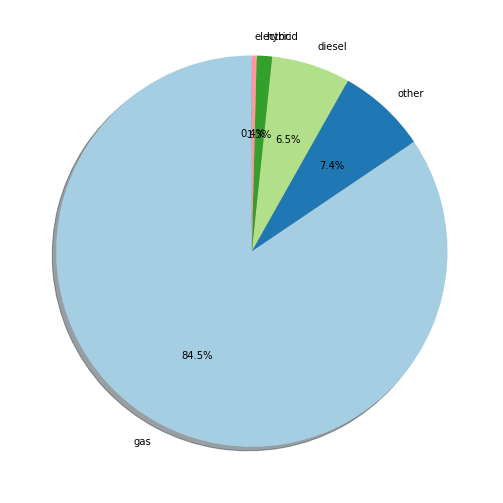

In [106]:
fuel=df['fuel'].value_counts()
labels=fuel.index
sizes=fuel.values
plt.figure(figsize=(12,9))
colors = sns.color_palette('Paired')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

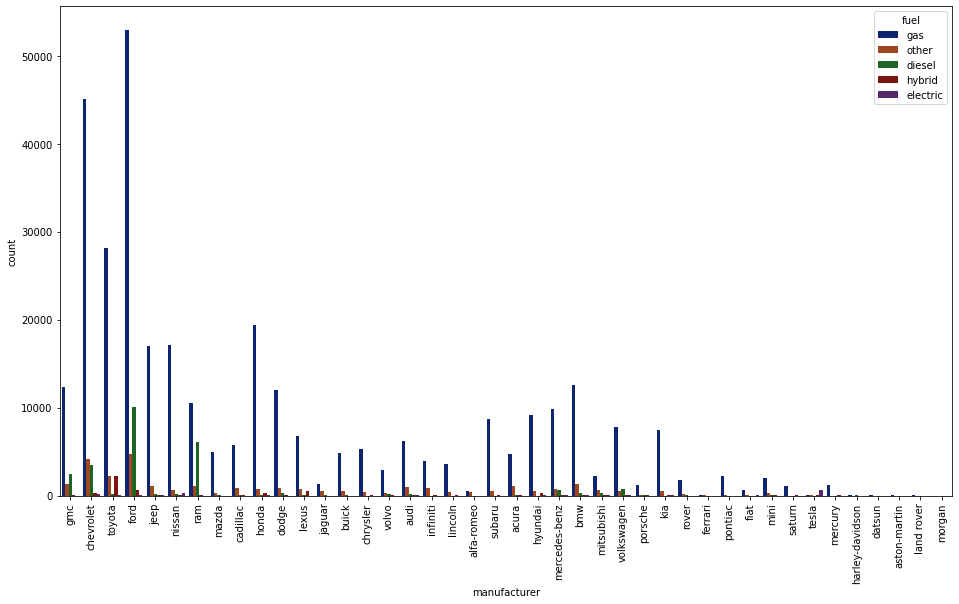

In [108]:
sns.set_palette('dark')
plt.figure(figsize=(16,9))
sns.countplot(x='manufacturer', hue='fuel', data=df)
plt.xticks(rotation=90)
plt.show()

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['manufacturer'] = le.fit_transform(df['manufacturer'])
df['condition'] = le.fit_transform(df['condition'])
df['fuel'] = le.fit_transform(df['fuel'])
df['title_status'] = le.fit_transform(df['title_status'])
df['transmission'] = le.fit_transform(df['transmission'])
df['state'] = le.fit_transform(df['state'])

In [114]:
df.corr()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,state
region,1.000000,-0.001469,-0.005129,0.001286,-0.004589,-0.006643,-0.006812,-0.000600,-0.008611,-0.016005,-0.036535
price,-0.001469,1.000000,-0.005502,0.002558,0.000013,0.003017,-0.000893,0.010880,-0.000908,-0.000787,-0.000794
year,-0.005129,-0.005502,1.000000,0.029967,0.063191,-0.119117,0.092593,-0.170113,-0.019361,0.146565,0.013480
manufacturer,0.001286,0.002558,0.029967,1.000000,-0.022850,-0.178719,-0.026263,0.002201,0.015218,0.001075,-0.013202
condition,-0.004589,0.000013,0.063191,-0.022850,1.000000,0.033588,0.121703,-0.031839,-0.001288,0.251924,-0.310078
cylinders,-0.006643,0.003017,-0.119117,-0.178719,0.033588,1.000000,-0.065815,0.017258,-0.059490,0.068446,0.018748
fuel,-0.006812,-0.000893,0.092593,-0.026263,0.121703,-0.065815,1.000000,-0.063998,-0.013113,0.263773,-0.030132
odometer,-0.000600,0.010880,-0.170113,0.002201,-0.031839,0.017258,-0.063998,1.000000,0.008987,-0.115919,-0.002951
title_status,-0.008611,-0.000908,-0.019361,0.015218,-0.001288,-0.059490,-0.013113,0.008987,1.000000,-0.056211,0.004995
transmission,-0.016005,-0.000787,0.146565,0.001075,0.251924,0.068446,0.263773,-0.115919,-0.056211,1.000000,-0.008054


<Figure size 1440x1440 with 0 Axes>

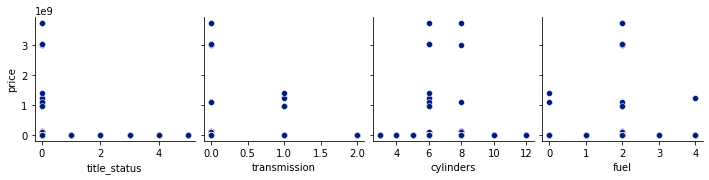

In [120]:
plt.figure(figsize = (20,20))
sns.pairplot(data = df , x_vars = ['title_status', 'transmission', 'cylinders', 'fuel'] , y_vars = ['price'])

<Figure size 1440x1440 with 0 Axes>

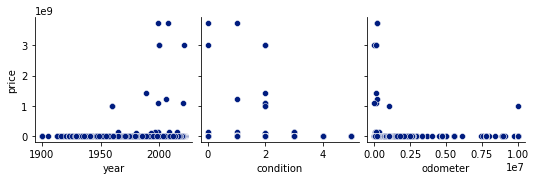

In [121]:
plt.figure(figsize = (20,20))
sns.pairplot(data = df , x_vars = ['year', 'condition', 'odometer'] , y_vars = ['price'])

In [117]:
df.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,state
0,16,33590,2014.0,14,2,8.0,2,57923.0,0,2,1
1,16,22590,2010.0,7,2,8.0,2,71229.0,0,2,1
2,16,39590,2020.0,7,2,8.0,2,19160.0,0,2,1
3,16,30990,2017.0,39,2,8.0,2,41124.0,0,2,1
4,16,15000,2013.0,13,0,6.0,2,128000.0,0,0,1


#### Findings
1. newer cars seem to be positively correlated
2. newer conditions seem to be positively correlated
3. less miles on the car seem to be positively correlated
4. newer title statuses are also positively correlated
5. 6 and 8 cylinder cars seem to be positively impacting the price

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [122]:
from sklearn.model_selection import train_test_split, GridSearchCV
x = df.drop(['price'],axis=1)
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [123]:
# the following scaler reduces the effect of outliers
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [124]:
x_train.shape

(276325, 10)

In [135]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [126]:
df_cop = df.copy()

In [130]:
# Linear Regression
reg = linear_model.LinearRegression()
reg_model = reg.fit(x_train , y_train)

In [136]:
get_cv_scores(reg_model)

CV Mean:  -0.0006944597561180821
STD:  0.001532757842676988




In [140]:
reg.coef_

array([-30897.88846059, -70578.74108319, 104509.10070626, -22692.27303849,
        25080.31758151,    705.90614951,  82978.90312621, -16637.89815868,
        38263.4478435 ,  25857.62762267])

In [141]:
pd.DataFrame(reg.coef_ , df.columns[:-1] ,  columns=['Coeficient'])

,Coeficient
region,-30897.888461
price,-70578.741083
year,104509.100706
manufacturer,-22692.273038
condition,25080.317582
cylinders,705.906150
fuel,82978.903126
odometer,-16637.898159
title_status,38263.447844
transmission,25857.627623


In [142]:
# Ridge
ridg = linear_model.Ridge(  alpha=0.9)
ridg.fit(x_train , y_train)

Ridge(alpha=0.9)

In [ ]:
# GRID SEARCH

In [143]:
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

In [144]:
grid = GridSearchCV(estimator=ridg, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.0006842997901069569
Best Params:  {'alpha': 1000}


In [145]:
# Lasso
lass = linear_model.Lasso(alpha=0.9)
lass.fit(x_train,y_train)

Lasso(alpha=0.9)

In [146]:
# GRID SEARCH for Lasso
grid = GridSearchCV(estimator=lass, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.0006754850642297861
Best Params:  {'alpha': 1000}


In [147]:
# Using best params
lass = linear_model.Lasso(alpha=1000)
lass.fit(x_train,y_train)

Lasso(alpha=1000)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

def run_experiment(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [149]:
# Linear
model = LinearRegression()
run_experiment(model)

R^2 :  -0.0002700451386126179
MAE : 174598.69997851583
RMSE: 12829829.583754532


In [150]:
# Lasso
model = linear_model.Lasso()
run_experiment(model)

R^2 :  -0.0002700384462734906
MAE : 174596.70633324643
RMSE: 12829829.540835336


In [151]:
# Ridge
model = linear_model.Ridge()
run_experiment(model)

R^2 :  -0.00027004376781691874
MAE : 174598.23870852307
RMSE: 12829829.574963368


#### Findings & Conclusions
1. Looking at the coefficients above, we can conclude the following features should be taken into consideration:
    - Year, the newer (higher) it is, the higher price
    - The less mileage on the car, the higher the price
    - The better the condition, the higher the price
    - The better the title status and the condition, the higher the price
    
Year was the most positively correlated to the price.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Final Findings
Based on our findings, the factors that affect the price the most are the following:
Year made, mileage, condition, title status, and the fuel.

Year was the highest correlated factor with the price.

The lower the mileage on the car, the higher the price.

The better the condition, the higher the price.

From the analysis we can see odometer, year, condition, fuel would be the most important factors.
The model should provide clear recommendations which cars consumers will value more than others.